In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("dataset.csv")

In [5]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [15]:
from sklearn.preprocessing import LabelEncoder
#instantiate labelencoder object
le = LabelEncoder()

In [16]:
df[ df.columns] = df[df.columns].apply(lambda col: le.fit_transform(col))
df[df.columns].head(10)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
5,3,3,0,0,0,1,2
6,3,3,0,0,0,2,2
7,3,3,0,0,0,0,2
8,3,3,0,1,2,1,2
9,3,3,0,1,2,2,2


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [20]:
from sklearn.cluster import KMeans

In [21]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(data_scaled)

In [22]:
from sklearn.cluster import DBSCAN

In [23]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(data_scaled)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [28]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering()
y_hc = hc.fit_predict(data_scaled)

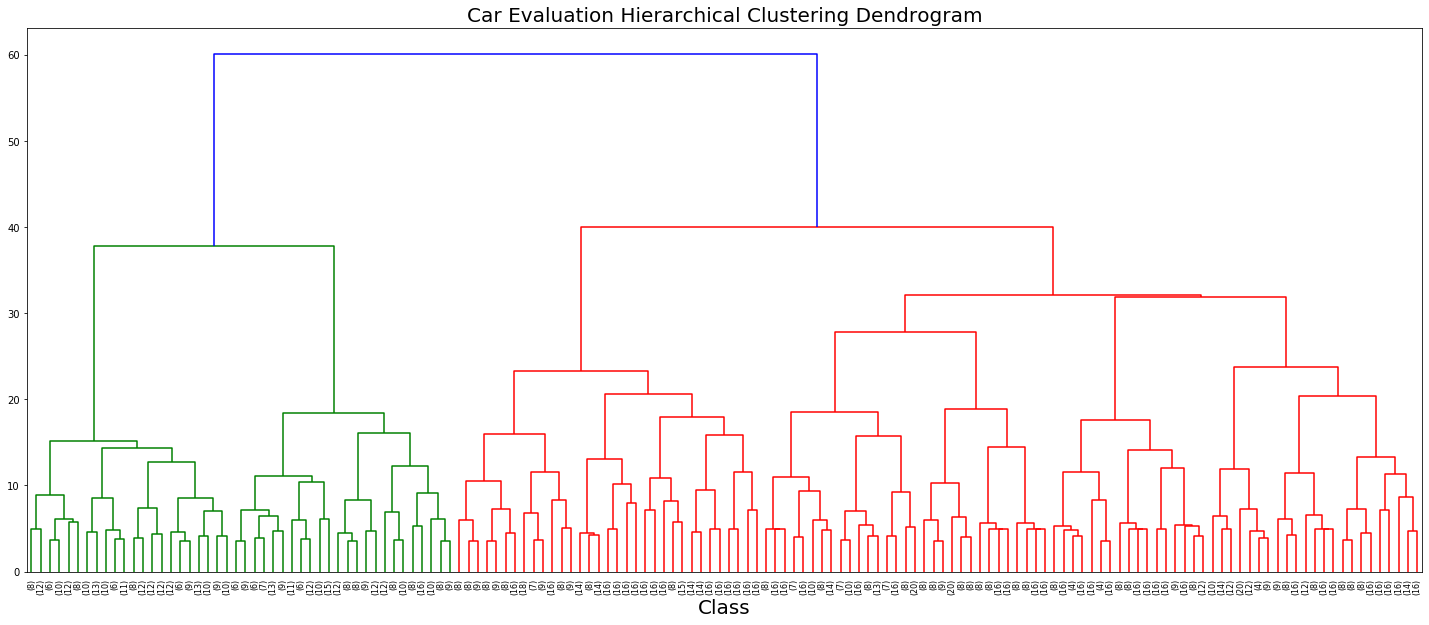

In [32]:
# calculate full dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data_scaled, 'ward')
plt.figure(figsize=(25,10))
plt.title('Car Evaluation Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Class', fontsize=20)
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=150,                  
    leaf_rotation=90.,      
    leaf_font_size=8.,      
)
plt.show()